In [1]:
import torch
import torch.nn as nn
import monai
import matplotlib.pyplot as plt

In [6]:
x = torch.randn(10, 3)
y = torch.FloatTensor(10, 3).random_(2)

In [7]:
# double the loss for class 1
class_weight = torch.FloatTensor([1.0, 2.0, 1.0])
# double the loss for last sample
element_weight = torch.FloatTensor([1.0]*9 + [2.0]).view(-1, 1)
element_weight = element_weight.repeat(1, 3)


In [9]:
class_weight, element_weight

(tensor([1., 2., 1.]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [2., 2., 2.]]))

In [4]:
bce_criterion = nn.BCEWithLogitsLoss(weight=None, reduce=False)
multi_criterion = nn.MultiLabelSoftMarginLoss(weight=None, reduce=False)

bce_criterion_class = nn.BCEWithLogitsLoss(weight=class_weight, reduce=False)
multi_criterion_class = nn.MultiLabelSoftMarginLoss(weight=class_weight, reduce=False)

bce_criterion_element = nn.BCEWithLogitsLoss(weight=element_weight, reduce=False)
multi_criterion_element = nn.MultiLabelSoftMarginLoss(weight=element_weight, reduce=False)


/home/anees.hashmi/.conda/envs/main/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [ ]:

bce_loss = bce_criterion(x, y)
multi_loss = multi_criterion(x, y)

bce_loss_class = bce_criterion_class(x, y)
multi_loss_class = multi_criterion_class(x, y)

bce_loss_element = bce_criterion_element(x, y)
multi_loss_element = multi_criterion_element(x, y)

print(bce_loss - multi_loss)
print(bce_loss_class - multi_loss_class)
print(bce_loss_element - multi_loss_element)

## Bot Stuff

In [10]:
import torch.nn as nn
import torch.nn.functional as F


In [45]:

class WeightedCrossEntropyLoss(nn.Module):
    def __init__(self, weight=None):
        super(WeightedCrossEntropyLoss, self).__init__()
        self.weight = weight

    def forward(self, input, target):
        n, c, h, w = input.size()
        input = input.transpose(1,2).transpose(2,3).contiguous().view(-1, c)
        target = target.view(-1)
        weight = torch.tensor([1, self.weight]).to(target.device)

        loss = F.cross_entropy(input, target, weight=weight, reduction='none')
        loss = loss.view(n, h, w)
        return torch.mean(loss)


In [47]:
# # Define the random vectors and corresponding labels
# input = torch.randn(1, 2, 3, 3)  # batch size = 1, number of classes = 2, height = 3, width = 3
# target = torch.LongTensor([[[0, 1, 1], [1, 0, 1], [0, 0, 1]]])  # ground truth labels, 0 for background and 1 for foreground

# # Define the weight for the second class
# weight_class_1 = 1
# weight_class_2 = 5
# weight = torch.tensor([weight_class_1, weight_class_2])

# # Define the loss function
# criterion = WeightedCrossEntropyLoss(weight)

# # Compute the loss
# loss = criterion(input, target)
# print(loss)


## Weighted CE

In [66]:
ce_loss = nn.CrossEntropyLoss(weight=torch.tensor([1, 5]))

In [ ]:
batch_size, num_classes, height, width = 1, 2, 3, 3

pred = torch.randn(batch_size, num_classes, height, width, requires_grad=True) # size b, c, h, w
target = torch.randn(batch_size, height, width, dtype=torch.long) # size b, c, h, w
target.shape

In [93]:
# target = target.view(batch_size, height, width).float()
# target.shap
# target = target.type(torch.LongTensor)
# pred = pred.type(torch.FloatTensor)

In [94]:
# # get argmax of targets
# gt = target.argmax(dim=1) # size b, h, w
# gt.shape, gt

In [95]:
sigmoid = nn.Sigmoid()

In [304]:
# ce_loss(pred, target)

In [306]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()
# # Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# output = loss(input, target)
# output.backward()

In [112]:
# torch.empty(3, dtype=torch.long).random_(5)
target, input

(tensor([4, 4, 2]),
 tensor([[-0.4176,  0.5993, -0.0302,  0.6690,  1.3046],
         [ 0.0381, -1.3491,  0.3433,  1.5649, -1.2164],
         [-0.5288, -0.5574,  2.3132, -0.8621, -0.5924]], requires_grad=True))

In [113]:
# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, target)
output.backward()

In [114]:
input.shape, target.shape

(torch.Size([3, 5]), torch.Size([3, 5]))

In [259]:
loss(pred, target)

tensor(2.2332, grad_fn=<DivBackward1>)

In [260]:
w_loss = nn.CrossEntropyLoss(weight=torch.tensor([1, 5]))

In [264]:
# import numpy as np

# # Define the input matrices
# y_true = np.array([[0., 0., 1.],
#                    [1., 0., 0.],
#                    [0., 0., 0.]])
# y_pred = np.array([[0., 0., 0.],
#                    [1., 0., 1.],
#                    [1., 1., 0.]])

# # Flatten the matrices to 1D arrays
# y_true = np.ravel(y_true)
# y_pred = np.ravel(y_pred)

# # Compute the intersection and union of non-zero elements
# intersection = np.intersect1d(np.where(y_true > 0), np.where(y_pred > 0))
# union = np.union1d(np.where(y_true > 0), np.where(y_pred > 0))

# # Compute the Jaccard score
# jaccard = len(intersection) / len(union)

# print("Jaccard score:", jaccard)


In [265]:
# y_pred.shape, y_true.shape

In [315]:
# pred = torch.tensor([[[1.5, -0.5], [0.5, -1.5]]], requires_grad=True)
pred = torch.randn(2, 1, 3, 3, requires_grad=True)
# target = torch.tensor([[[1.0, 0.0], [0.0, 1.0]]])
target = torch.randint(0, 2, (2, 1, 3, 3)).float()
target.shape, pred.shape

(torch.Size([2, 1, 3, 3]), torch.Size([2, 1, 3, 3]))

In [322]:
pred_0 = pred.softmax(dim=1).round()[:, 0, :, :]
pred_0.shape

torch.Size([2, 3, 3])

In [323]:
dice_score(pred_0, target[:, 0, :, :]), jaccard_score(pred_0, target[:, 0, :, :])

(tensor([0.5000, 0.8696]),
 tensor([[0.3333, 0.3333],
         [0.6667, 1.0000]]))

In [16]:
dice_score = monai.metrics.GeneralizedDiceScore(include_background=False)
jaccard_score = monai.metrics.MeanIoU(include_background=False)
print(sum(dice_score(pred.softmax(dim=1).round(), target))/pred.shape[0], sum(jaccard_score(pred.softmax(dim=1).round(), target))/pred.shape[0] )
print(dice_score(pred.softmax(dim=1).round(), target), jaccard_score(pred.softmax(dim=1).round(), target))

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_2681824/1272020734.py:3 in <cell line: 3>                                  │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_2681824/1272020734.py'               │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'pred' is not defined

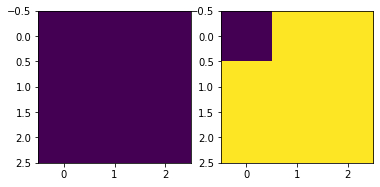

In [302]:
plt.subplot(1, 2, 1)
plt.imshow(pred.softmax(dim=1).round()[0, 0, :,:].detach().numpy())
plt.subplot(1, 2, 2)
plt.imshow(target[0, 0, :,:].detach().numpy())

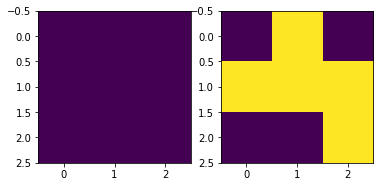

In [303]:
plt.subplot(1, 2, 1)
plt.imshow(pred.softmax(dim=1).round()[1, 0, :,:].detach().numpy())
plt.subplot(1, 2, 2)
plt.imshow(target[1,0,:,:].detach().numpy())
plt.show()

In [184]:
pred, target

(tensor([[[ 1.5000, -0.5000],
          [ 0.5000, -1.5000]]], requires_grad=True),
 tensor([[[1., 0.],
          [0., 1.]]]))

In [4]:
import torch
import monai

# Create a batch of dummy data
batch_size = 4
num_classes = 2
height = 128
width = 128
num_channels = 2
y_true = torch.randint(low=0, high=num_classes, size=(batch_size, num_channels, height, width))
y_pred = torch.randint(low=0, high=num_classes, size=(batch_size, num_channels, height, width))

In [391]:
criterion = monai.losses.FocalLoss()

In [397]:
# y_pred_1 = 
# np.where equivalent in pytorch
# y_pred_1 = torch.where(y_pred ==1, y_pred, 0)
b = y_true[:,0,:,:] == 1
b.shape,  b.nonzero().shape

(torch.Size([4, 128, 128]), torch.Size([32868, 3]))

In [3]:
y1 = torch.tensor([[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]]])
y2 = torch.tensor([[[0, 0, 1], [0, 1, 0], [1, 0, 0]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]]])
# y2[y1.nonzero()]

In [5]:
# x = y1 == 1
# y2.nonzero().shape , type(y2.nonzero()), y2.nonzero()
# y2[y1.nonzero()]

# create a boolean tensor indicating where y1 and y2 are equal
mask = y1 == 1

# use boolean indexing to select elements from y2 where mask is True
result = y2[mask]
print(y1[mask])
print(result)


tensor([1, 1, 1, 1, 1, 1])
tensor([0, 1, 0, 1, 1, 1])


In [6]:
torch.tensor([[0,1], [1,1],[1,1]]).shape

torch.Size([3, 2])

In [7]:
list(torch.tensor([[0,1], [1,1],[1,1]]))

[tensor([0, 1]), tensor([1, 1]), tensor([1, 1])]

In [8]:
# print(y2)
y2[list(torch.tensor([[0,1], [1,1],[1,1]]))]

tensor([1, 1])

In [9]:
import torch

# create a 2D tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# create a list of indices
indices = [[0, 1], [1, 2]]

# use indexing to retrieve values at the specified indices
values = x[indices]

print(values)


tensor([2, 6])


In [10]:
x[[0,1]]

tensor([[1, 2, 3],
        [4, 5, 6]])

In [11]:
# get indexes of y_true where y_true == 1
y_true_1 = torch.where(y_true == 1, y_true, 0)
y_true_1.shape, y_true_1.nonzero().shape

(torch.Size([4, 2, 128, 128]), torch.Size([65708, 4]))

In [21]:
y_pred.shape, y_true.shape
# y_pred.max(), y_pred.min(), y_true.max(), y_true.min()
# y_pred.unique()

(torch.Size([4, 2, 128, 128]), torch.Size([4, 2, 128, 128]))

In [17]:

# Compute the mIoU for the entire batch
miou = monai.metrics.compute_iou(y_pred, y_true, include_background=False)
dice = monai.metrics.compute_meandice(y_pred, y_true, include_background=False)

# Compute the mean across all elements of the miou tensor
mean_miou = miou.mean()
mean_dice = dice.mean()

print("Mean IoU:", mean_miou)
print("Mean Dice:", mean_dice)



Mean IoU: tensor(0.3359)
Mean Dice: tensor(0.5029)


In [384]:
y_true[:,0,:,:].reshape(y_true.shape[0], 1, y_pred.shape[2], y_pred.shape[3]).shape

torch.Size([4, 1, 128, 128])

In [390]:
miou = monai.metrics.compute_iou(
    y_pred[:,0,:,:].reshape(y_true.shape[0], 1, y_pred.shape[2], y_pred.shape[3]),
    y_true[:,0,:,:].reshape(y_true.shape[0], 1, y_pred.shape[2], y_pred.shape[3]), 
    include_background=False)
miou.mean()

tensor(0.3336)

In [373]:
# miou.shape, y_pred.shape, y_true.shape, y_pred.unique(), y_true.unique()
dice.shape


(torch.Size([4, 1]),)

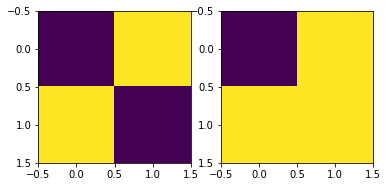

In [338]:
plt.subplot(1, 2, 1)
plt.imshow(y_pred[0,:,:].detach().numpy())
plt.subplot(1, 2, 2)
plt.imshow(y_true[0,:,:].detach().numpy())

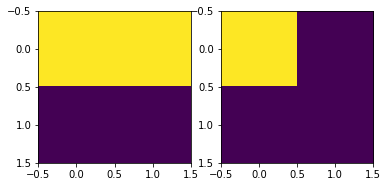

In [336]:
plt.subplot(1, 2, 1)
plt.imshow(y_pred[1,:,:].detach().numpy())
plt.subplot(1, 2, 2)
plt.imshow(y_true[1,:,:].detach().numpy())

In [330]:
y_true.shape, y_pred.shape

(torch.Size([2, 2, 2]), torch.Size([2, 2, 2]))

In [61]:
def criterion(y_pred, y_true):
    if len(y_pred.shape) == 3: # for single class
        return monai.metrics.compute_dice(y_pred.reshape(y_pred.shape[0], 1, 128, 128), 
                                    y_true.reshape(y_true.shape[0], 1, 128, 128), 
                                    include_background=False, ignore_empty=False).mean().item()
    # for multi class
    return monai.metrics.compute_dice(y_pred, y_true, include_background=False, ignore_empty=False).mean().item()


In [62]:
y_pred.shape , y_true.shape, criterion(y_pred, y_true)

(torch.Size([4, 2, 128, 128]), torch.Size([4, 2, 128, 128]), 0.502871036529541)

In [63]:
len((y_pred.shape))

4

In [64]:
y_pred[:,0,:,:].shape, y_true[:,0,:,:].shape, criterion(y_pred[:,0,:,:], y_true[:,0,:,:])

(torch.Size([4, 128, 128]), torch.Size([4, 128, 128]), 0.5004803538322449)

In [48]:
65536/256

256.0